### import required liabraries

In [36]:
import numpy as np
import pandas as pd

# Read the .csv file from local memory
df = pd.read_csv('car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


### Data Preprocessing

In [2]:
df.shape

(301, 9)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


#### value_counts()

In [4]:
df.Car_Name.value_counts()
#here the car_name is not required column so we drop that column

city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
800                          1
Royal Enfield Bullet 350     1
Hero Passion X pro           1
Activa 4g                    1
Bajaj Avenger 150 street     1
Name: Car_Name, Length: 98, dtype: int64

In [5]:
df.Fuel_Type.value_counts()
# THERE ARE 3 TYPES OF FUEL types and mostly petrol use are in car

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [6]:
df.Seller_Type.value_counts()
# mejority peoples are going to Dealer 

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

### checking the Missing value

In [7]:
df.isnull().sum()
# no null values 

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [37]:
# we just know the year of purches and lets calculate the how many year of completed till now
df['Year_of_purchased'] = 2021 - df['Year']
df[:2]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Year_of_purchased
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,8


In [38]:
# So we created year of purchased then drop the unusful car_name and year column
df.drop(['Car_Name','Year'],axis='columns',inplace = True)
df[:2]

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Year_of_purchased
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8


## Exploratory Data Analysis

C:\Users\shiva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\shiva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\shiva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\shiva\anaconda3\lib\si

AxesSubplot(0.125,0.125;0.133621x0.755)
AxesSubplot(0.285345,0.125;0.133621x0.755)
AxesSubplot(0.44569,0.125;0.133621x0.755)
AxesSubplot(0.606034,0.125;0.133621x0.755)
AxesSubplot(0.766379,0.125;0.133621x0.755)


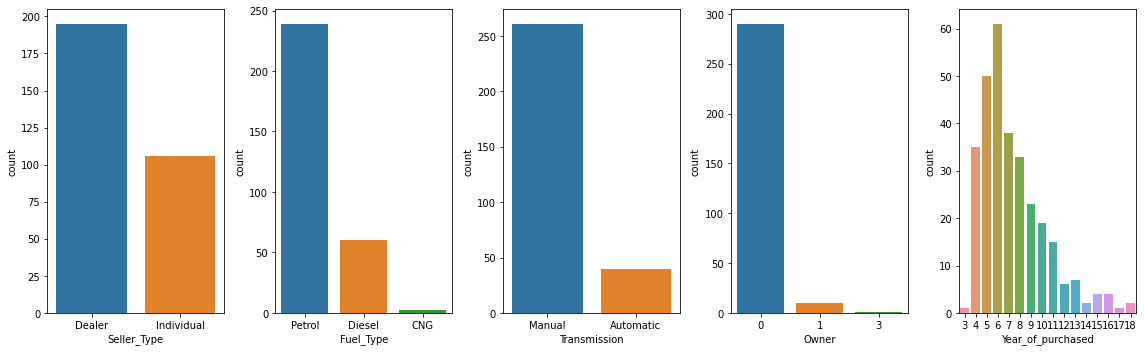

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16,5))
plt.subplot(1,5,1)
print(sns.countplot(df['Seller_Type']))
plt.subplot(1,5,2)
print(sns.countplot(df['Fuel_Type']))
plt.subplot(1,5,3)
print(sns.countplot(df['Transmission']))
plt.subplot(1,5,4)
print(sns.countplot(df['Owner']))
plt.subplot(1,5,5)
print(sns.countplot(df['Year_of_purchased']))
plt.tight_layout()

### Correlation between all the columns and heatmap

In [40]:
df.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Year_of_purchased
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104
Year_of_purchased,-0.236141,0.047584,0.524342,0.182104,1.000000


<AxesSubplot:>

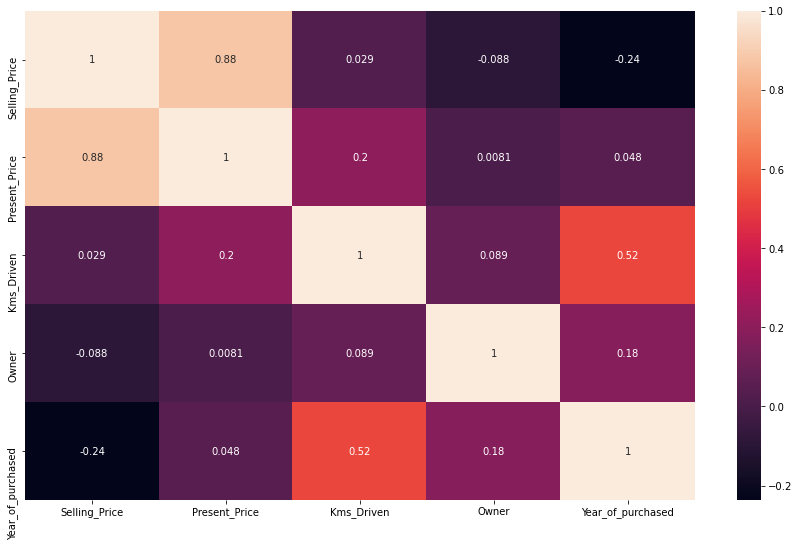

In [41]:
plt.figure(figsize=(15,9))
sns.heatmap(df.corr(),annot=True)

### Encoding 

In [42]:
df[:3]

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Year_of_purchased
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4


In [44]:
# now encoding the categorical data type in to numerical data types
# in datatframe Fuel_type,Seller_Type,Transmission are the categorical data type columns
# all columns are in ordinals 

dummy = pd.get_dummies(df['Fuel_Type'])
dummy[:2]


,CNG,Diesel,Petrol
0,0,0,1
1,0,1,0


In [45]:
df = pd.concat([df,dummy],axis = 'columns')
df[:2]

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Year_of_purchased,CNG,Diesel,Petrol
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7,0,0,1
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8,0,1,0


In [46]:
df.drop('Fuel_Type',axis = 'columns',inplace = True)
df[:2]

,Selling_Price,Present_Price,Kms_Driven,Seller_Type,Transmission,Owner,Year_of_purchased,CNG,Diesel,Petrol
0,3.35,5.59,27000,Dealer,Manual,0,7,0,0,1
1,4.75,9.54,43000,Dealer,Manual,0,8,0,1,0


In [52]:
#using LabelEncoder()

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Seller_Type'] = le.fit_transform(df['Seller_Type'])  # Seller_Type is Dealer is 0 and Indiviusal is 1
df['Transmission'] = le.fit_transform(df['Transmission'])  # Transmission is Automatic is 0 and Manual is 1
df[:3]

,Selling_Price,Present_Price,Kms_Driven,Seller_Type,Transmission,Owner,Year_of_purchased,CNG,Diesel,Petrol
0,3.35,5.59,27000,0,1,0,7,0,0,1
1,4.75,9.54,43000,0,1,0,8,0,1,0
2,7.25,9.85,6900,0,1,0,4,0,0,1


#### Now the all columns are in numerical types


In [53]:
# Divied in indepedent and dependent columns
# here the selling_price is the depedent on remaining all columns so that is depednent column

x = df.iloc[:,1:]
y = df.iloc[:,0]

print(x[:5])
print(y[:5])

   Present_Price  Kms_Driven  Seller_Type  Transmission  Owner  \
0           5.59       27000            0             1      0   
1           9.54       43000            0             1      0   
2           9.85        6900            0             1      0   
3           4.15        5200            0             1      0   
4           6.87       42450            0             1      0   

   Year_of_purchased  CNG  Diesel  Petrol  
0                  7    0       0       1  
1                  8    0       1       0  
2                  4    0       0       1  
3                 10    0       0       1  
4                  7    0       1       0  
0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64


### splitting the into tarin and test by using train_test_split

In [54]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state = False)

print(len(x))
print(len(x_train))  # 80%
print(len(x_test))   # 20% 

#100 80%Tr 20%Te  1  20
#100 80%tr        2  20-40
#100 20% test     3   40-60 100


301
240
61


In [55]:
x_train[:2]

,Present_Price,Kms_Driven,Seller_Type,Transmission,Owner,Year_of_purchased,CNG,Diesel,Petrol
74,8.93,83000,0,1,0,7,0,1,0
239,4.43,23709,0,1,0,9,0,0,1


## Feature scaling the train and test datasets

In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [51]:
x_train[:2]

array([[ 0.1466226 ,  1.05706025, -0.7540739 ,  0.37073003, -0.1393466 ,
        -0.14709233, -0.09166985,  2.081666  , -2.02642122],
       [-0.35552552, -0.3529268 , -0.7540739 ,  0.37073003, -0.1393466 ,
         0.53179535, -0.09166985, -0.48038446,  0.49348082]])

In [19]:
#x_train.describe()
x.describe()
print(type(x_train))
print(type(x_test))
type(x)
data = pd.DataFrame(x_train,columns = x.columns)
data.describe()
data


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


,Present_Price,Kms_Driven,Seller_Type,Transmission,Owner,Year_of_purchased,CNG,Diesel,Petrol
0,0.146623,1.057060,-0.754074,0.370730,-0.139347,-0.147092,-0.09167,2.081666,-2.026421
1,-0.355526,-0.352927,-0.754074,0.370730,-0.139347,0.531795,-0.09167,-0.480384,0.493481
2,3.192988,-0.774061,-0.754074,-2.697381,-0.139347,-1.165424,-0.09167,2.081666,-2.026421
3,-0.091061,-0.131528,-0.754074,0.370730,-0.139347,-0.147092,-0.09167,-0.480384,0.493481
4,0.031686,-0.237352,-0.754074,0.370730,-0.139347,-0.825980,-0.09167,-0.480384,0.493481
...,...,...,...,...,...,...,...,...,...
235,0.254863,0.431649,-0.754074,0.370730,-0.139347,0.192352,-0.09167,-0.480384,0.493481
236,-0.766171,0.248513,1.326130,0.370730,4.041051,2.229015,-0.09167,-0.480384,0.493481
237,-0.637844,-0.583815,1.326130,0.370730,-0.139347,-0.486536,-0.09167,-0.480384,0.493481
238,-0.386770,0.629006,-0.754074,0.370730,-0.139347,2.568458,-0.09167,-0.480384,0.493481


In [ ]:
it is an supervised machine learning method
1. regression ml - relationship bt independent and depedent columns
                   regression dependent columns values continous values
    1.linear regression model
    2.decisiorandn tree
    3.random forest
    4.losso regression
    5.redge regression
    5.svr(Support vector regressor) svm
    6.knn(k- nearest neibour)
    7.navie bayes
    8.xgboosting
    
2.classification ml - relationship bt independent and depedent columns
                      classification depednt column values descrted values 1. binary(0,1) 2. mulinomial(0 to 9)
    1.logistic regression
    2.decision tree
    3.random forest
    4.svc(support vector classifier)
    5.extra tree classifier
    
    


## Linear regression model

In [56]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# fitting the data into linear model
lr.fit(x_train,y_train)

# lets see the prediction of test datasets
y_lr_pred = lr.predict(x_test)

In [59]:
y_lr_pred[:5]

array([ 7.51749959, -0.38136   ,  4.2559471 ,  9.00719207, 14.4269339 ])

In [60]:
y_test[:5]

223     8.25
150     0.50
226     5.25
296     9.50
52     18.00
Name: Selling_Price, dtype: float64

### r2_score of linear regresssion algorithm

In [21]:
from sklearn.metrics import r2_score
linearregression = r2_score(y_test,y_lr_pred)
print(linearregression)

0.9144342972228513


### drow the prediction and acutual test values 

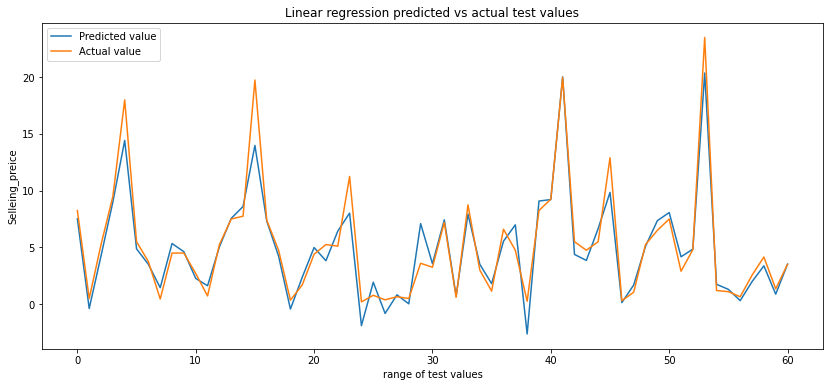

In [22]:
plt.figure(figsize=(14,6))
y_lr_pred = lr.predict(x_test)
x_values = np.arange(0,len(y_lr_pred),1)
plt.plot(x_values, y_lr_pred, label='Predicted value')
plt.plot(x_values, y_test, label='Actual value')
plt.title('Linear regression predicted vs actual test values')
plt.xlabel('range of test values')
plt.ylabel('Selleing_preice')
plt.legend()

### obsevarion : Linear Regression is get an accuracy 91.4%, the prediction and actual value almost closer lines.

## Decision Tree model

In [61]:
from sklearn.tree import DecisionTreeRegressor
dc = DecisionTreeRegressor()

# fitting the data into linear model
dc.fit(x_train,y_train)

# lets see the prediction of test datasets
y_dc_pred = dc.predict(x_test)

In [63]:
y_test[:5]

223     8.25
150     0.50
226     5.25
296     9.50
52     18.00
Name: Selling_Price, dtype: float64

In [64]:
y_dc_pred[:5]

array([ 6.85,  0.4 ,  4.4 ,  7.75, 14.25])

### r2_score of Decision Tree algorithm

In [24]:
from sklearn.metrics import r2_score
DecisionTree = r2_score(y_test,y_dc_pred)
print(DecisionTree)

0.9423265112757956


### drow the prediction and acutual test values

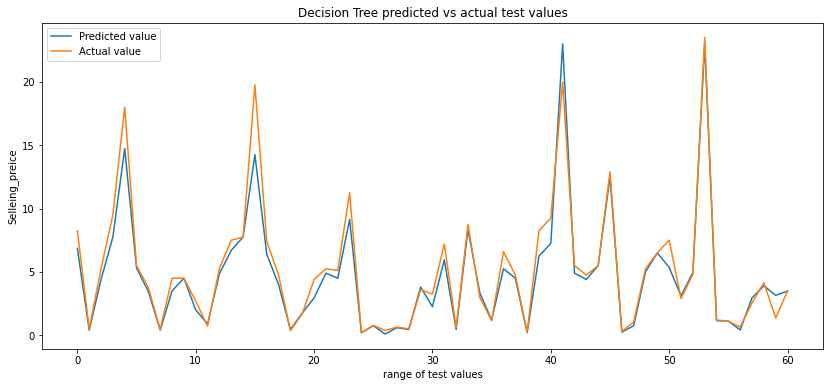

In [25]:
plt.figure(figsize=(14,6))
y_dc_pred = dc.predict(x_test)
x_values = np.arange(0,len(y_dc_pred),1)
plt.plot(x_values, y_dc_pred, label='Predicted value')
plt.plot(x_values, y_test, label='Actual value')
plt.title('Decision Tree predicted vs actual test values')
plt.xlabel('range of test values')
plt.ylabel('Selleing_preice')
plt.legend()

### obsevarion : Decision Tree is get an accuracy 94.8%, the prediction and actual value almost closer lines.

## Random Forest model

In [26]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=20)

# fitting the data into linear model
rf.fit(x_train,y_train)

# lets see the prediction of test datasets
y_rf_pred = rf.predict(x_test)

### r2_score of Random Foest Algorithm

In [27]:
from sklearn.metrics import r2_score
Randomforest = r2_score(y_test,y_rf_pred)
print(Randomforest)

0.9413089930973529


### drow the prediction and acutual test values 

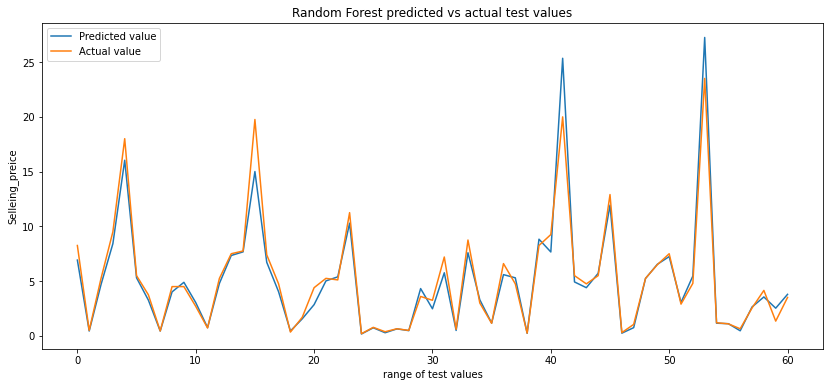

In [28]:
plt.figure(figsize=(14,6))
y_rf_pred = rf.predict(x_test)
x_values = np.arange(0,len(y_rf_pred),1)
plt.plot(x_values, y_rf_pred, label='Predicted value')
plt.plot(x_values, y_test, label='Actual value')
plt.title('Random Forest predicted vs actual test values')
plt.xlabel('range of test values')
plt.ylabel('Selleing_preice')
plt.legend()

### obsevarion : random forest is get an accuracy 95.8%, the prediction and actual value almost closer lines.

## Support Vector Machine Model

In [29]:
from sklearn.svm import SVR
svm = SVR()

# fitting the data into linear model
svm.fit(x_train,y_train)

# lets see the prediction of test datasets
y_svm_pred = svm.predict(x_test)

### r2_score of Support Vector Machine Algorithm

In [30]:
from sklearn.metrics import r2_score
SVM = r2_score(y_test,y_svm_pred)
print(SVM)

0.7234666728310312


### drow the prediction and acutual test values 

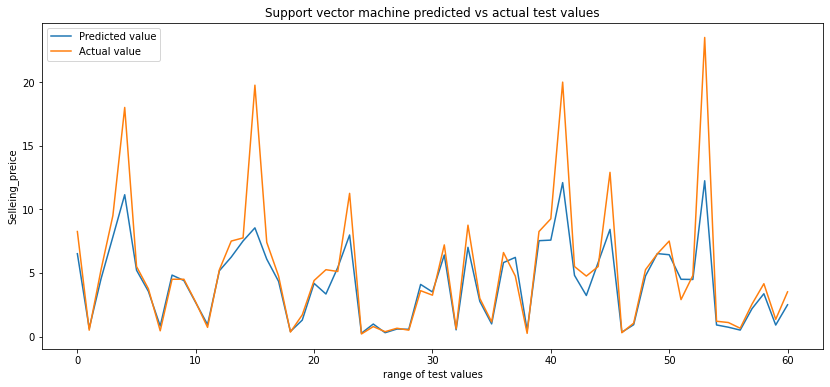

In [31]:
plt.figure(figsize=(14,6))
y_svm_pred = svm.predict(x_test)
x_values = np.arange(0,len(y_svm_pred),1)
plt.plot(x_values, y_svm_pred, label='Predicted value')
plt.plot(x_values, y_test, label='Actual value')
plt.title('Support vector machine predicted vs actual test values')
plt.xlabel('range of test values')
plt.ylabel('Selleing_preice')
plt.legend()

### obsevarion : Support Vector Machine is get an accuracy 72.3%, to compare other algorithms the prediction and actual value lines little bit difference.

In [32]:
pd.DataFrame({'Models':['linear regression','Decision Tree','Random Forest','Support Vector Machine'],
                         'r2_score':[linearregression,DecisionTree,Randomforest,SVM]})

,Models,r2_score
0,linear regression,0.914434
1,Decision Tree,0.942327
2,Random Forest,0.941309
3,Support Vector Machine,0.723467


### the above DataFrame is shown the model names and r2_score of each algorithms accuracy score result.
in the car price predict dataset is best fit the algorithm is to be decision tree and also Random froest algorithms

In [33]:
save the into the model

'into the model' was not found in history, as a file, url, nor in the user namespace.


In [65]:
import pickle
pickle.dump(dc,open('model.pkl','wb'))
model = pickle.load(open('model.pkl','rb'))